In [110]:
#importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [112]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [113]:
#read and check .csv
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [114]:
#learn datatypes
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [117]:
#drop inconsistent data
df.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [118]:
#describing a data set
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [119]:
#convert date to datetime
df["date"] = df["date"].str.slice(0, (df["date"].str.find('T').astype(int)[1]))
df["date"]=pd.to_datetime({'year':df["date"].str[:4],'month':df["date"].str[4:6], 'day':df["date"].str[6:8]})
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [120]:
#describing a data set
for column in df:
    if df[column].dtypes is object:
        df.describe(include=['object'])


In [121]:
#check and fix the NaN
for column in df:
    if df[column].isnull().sum() > 0:
        if df[column].dtype is object:
            print ('number of NaN values for the "', column, ", replaced by freq:", df[column].isnull().sum())
            print (column, "is an object")
            freq=df[column].mode()
            df[column].replace(np.nan,freq, inplace=True)
        else:
            print ("number of NaN values for the", column, ", replaced by mean:", df[column].isnull().sum())
            mean=df[column].mean()
            df[column].replace(np.nan,mean, inplace=True)
            print (column, "is not an object")

number of NaN values for the bedrooms , replaced by mean: 13
bedrooms is not an object
number of NaN values for the bathrooms , replaced by mean: 10
bathrooms is not an object


In [122]:
#Let's check the correlation table:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:>

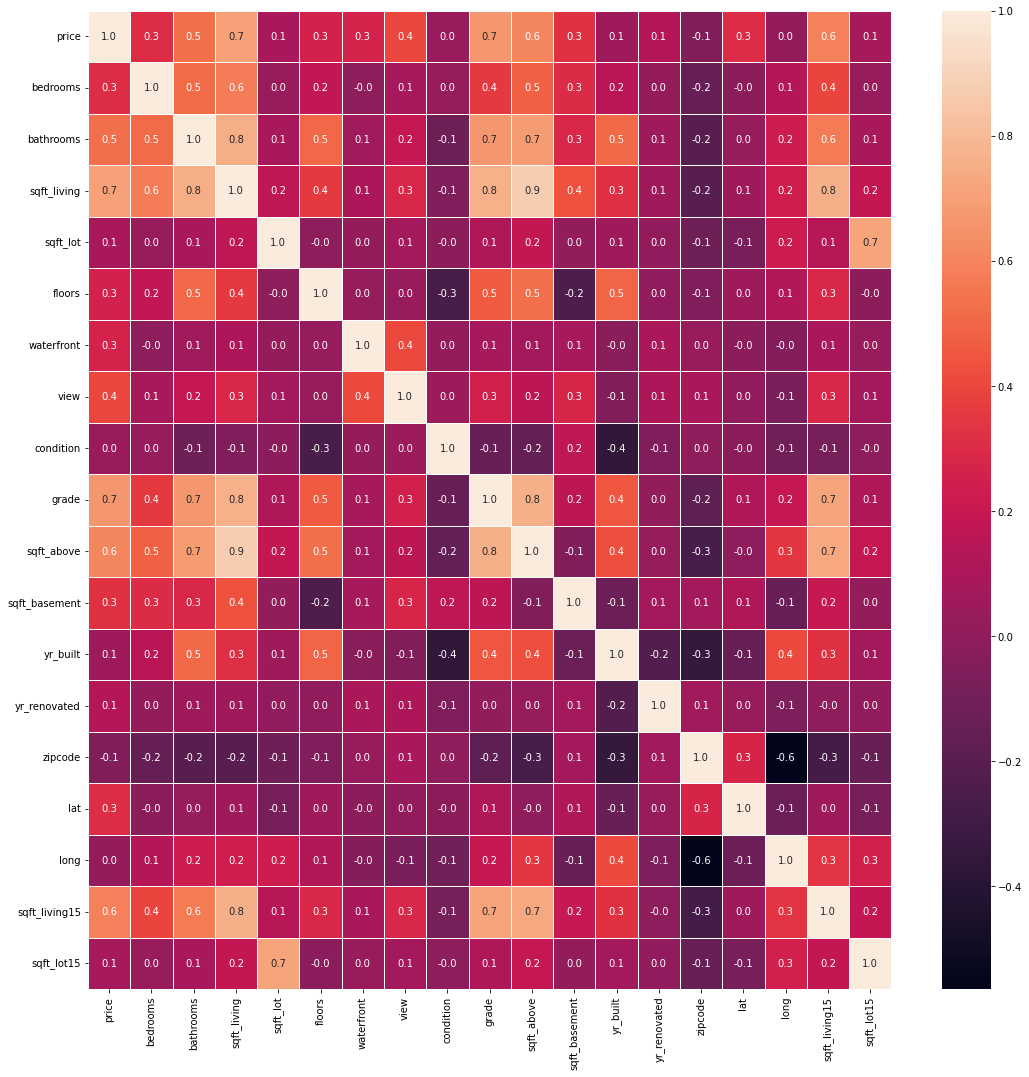

In [123]:
#let's display the correlation coefficients on the heatmap to find the correlated features:
f, ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='.1f', ax=ax)

In [124]:
#let's find the most significant pearson correlation coefficients:
S=df.corr()
Pos_cor=S[S["price"] > 0.5]
Pos_cor["price"].sort_values()

bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [128]:
#Cut dataframe to the most signifecant features:
df_s = df.iloc[:,[1,3,4,10,11,18]]
df_s.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


<AxesSubplot:>

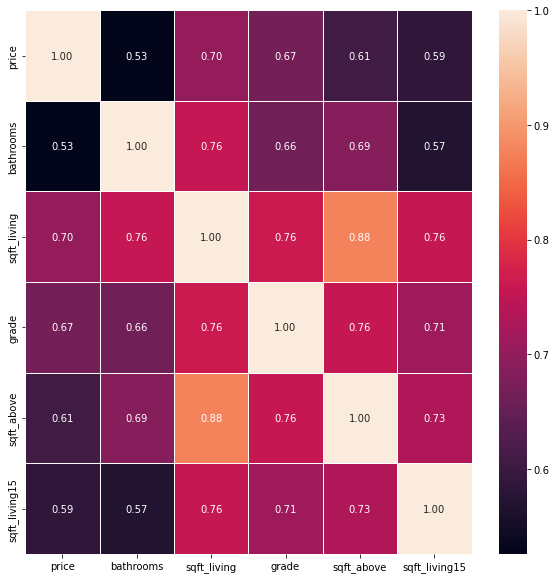

In [129]:
#let's display the correlation coefficients on the heatmap for the most significant features:
f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df_s.corr(), annot=True, linewidth=0.5, fmt='.2f', ax=ax)

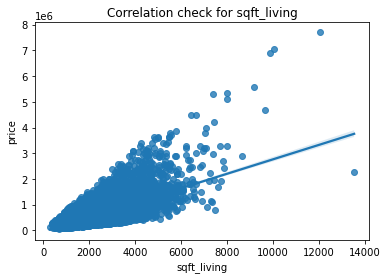

In [130]:
#Correlation check for sqft_living
bp=sns.regplot(x=df["sqft_living"], y=df["price"], data=df).set(title="Correlation check for sqft_living")

In [131]:
#Try to fit a linear regression:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print("Yhat_sqft_living =", lm.intercept_, "+", lm.coef_, "* X")
print ("R^2 =", lm.score(X, Y))

Yhat_sqft_living = -43580.743094473844 + [280.6235679] * X
R^2 = 0.4928532179037931


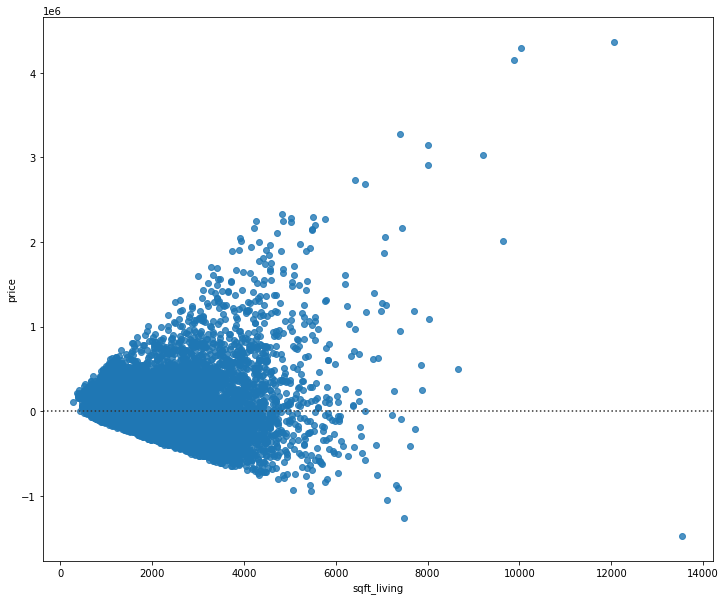

In [132]:
#Check the residual plot for the sqft_living:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['sqft_living'], df['price'])
plt.show()

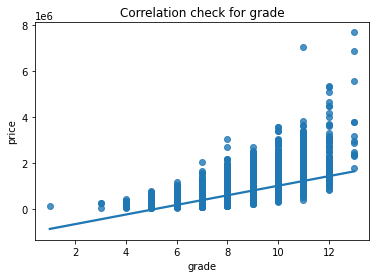

In [133]:
#Correlation check for the grade:
bp=sns.regplot(x=df["grade"], y=df["price"], data=df).set(title="Correlation check for grade")

In [134]:
#Check the residual plot for the grade:
X = df[['grade']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print("Yhat_grade =", lm.intercept_, "+", lm.coef_, "* X")
print ("R^2 =", lm.score(X, Y))

Yhat_grade = -1056044.9770097644 + [208457.56245838] * X
R^2 = 0.44546848610928724


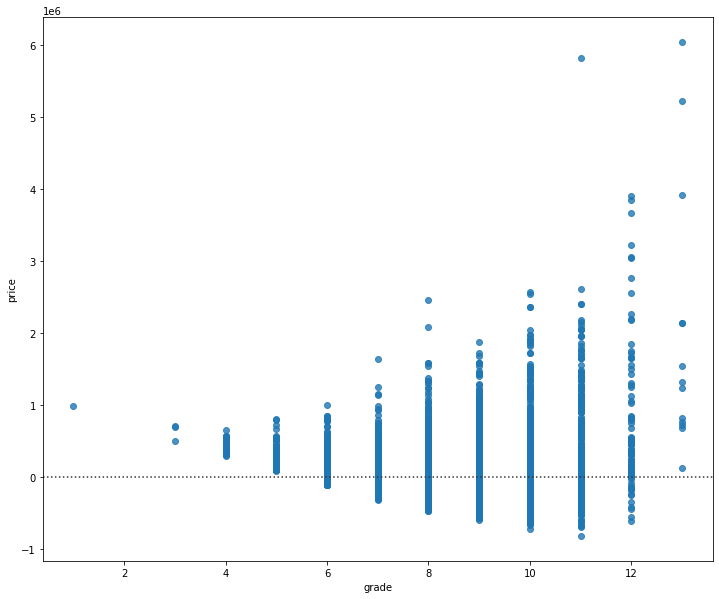

In [135]:
#Check the residual plot for the grade:
plt.figure(figsize=(width, height))
sns.residplot(df['grade'], df['price'])
plt.show()

In [136]:
#Check 2-parameter linear regression:
features = ["sqft_living","grade"]     
X = df[features]
Y = df["price"]
lm1 = LinearRegression()
lm1.fit(X,Y)
yhat=lm1.predict(X)
sc=lm1.score(X, Y)
print("R^2 for the features is", sc)

R^2 for the features is 0.534502380535107


In [137]:
#Check 5-parameter linear regression:
features = ["sqft_living","grade", "bathrooms", "view", "floors"]     
X = df[features]
Y = df["price"]
coef=[]
lm2 = LinearRegression()
lm2.fit(X,Y)
lm2.intercept_
coef=lm2.coef_
yhat=lm2.predict(X)
sc=lm2.score(X, Y)
print("R^2 for the features is", sc, ", b0 is", lm.intercept_, ", array b(i) is", coef)

R^2 for the features is 0.5748035548261241 , b0 is -1056044.9770097644 , array b(i) is [   178.27518383 100992.33840316 -22928.14284117  95360.320059
 -21056.23900398]


In [138]:
#Let's predict multilinear regression:
Y_hat = lm2.predict(df[features])

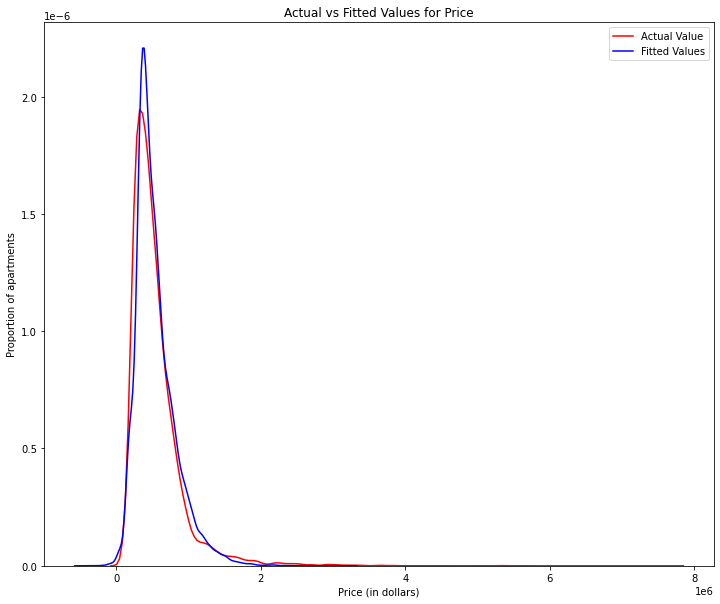

In [139]:
#visualize with seaborn:
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(df['price'], color="r")
sns.kdeplot(Y_hat, color="b", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of apartments')

plt.legend(['Actual Value', 'Fitted Values'])
plt.show()
plt.close()

In [140]:

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 14, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ grade')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of apartments')

    plt.show()
    plt.close()

In [141]:
x = df['grade']
y = df['price']

In [142]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

      3            2
5239 x - 8.64e+04 x + 5.489e+05 x - 1.003e+06


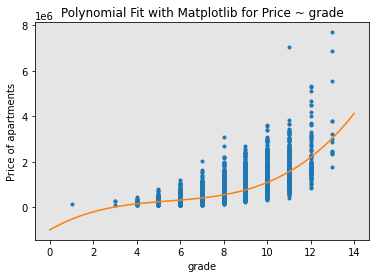

In [143]:
#Let's plot the function:
PlotPolly(p, x, y, 'grade')

In [144]:
np.polyfit(x, y, 3)

array([    5239.43496173,   -86397.20113561,   548885.27257056,
       -1002870.70192272])

In [145]:
#Let's evaluate and compare the models:
#sqft_living_fit
lm.fit(df[['sqft_living']], df['price'])
# Find the R^2
print('The R-square for the LR model is: ', lm.score(df[['sqft_living']], df['price']))
print( round(lm.score(df[['sqft_living']], df['price'])*100, 2), '% of the variation of the price is explained by this simple linear model "sqft_living_fit"')

The R-square for the LR model is:  0.4928532179037931
49.29 % of the variation of the price is explained by this simple linear model "sqft_living_fit"


In [146]:
#We can predict the output i.e., "yhat" using the predict method, where X is the input variable:
Yhat=lm.predict(df[['sqft_living']])
print("Linear regression evaluation:")
print('The output of the first four predicted value is:', Yhat[0:4])
#import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error
#compare the predicted results with the actual results:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is:', mse)

Linear regression evaluation:
The output of the first four predicted value is: [287555.06702452 677621.82640197 172499.40418656 506441.44998452]
The mean square error of price and predicted value is: 68351286833.039825


In [147]:
# fit the MLR model 
lm2.fit(df[features], df['price'])
# Find the R^2
print('The R-square for the MLR model is: ', lm2.score(df[features], df['price']))
print( round(lm2.score(df[features], df['price'])*100, 2), '% of the variation of the price is explained by this multilinear model')

The R-square for the MLR model is:  0.5748035548261241
57.48 % of the variation of the price is explained by this multilinear model


In [148]:
print ("Multiple linear regression evaluation:")
Y_predict_multifit = lm2.predict(df[features])
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

Multiple linear regression evaluation:
The mean square error of price and predicted value using multifit is:  57306336568.562164


In [149]:
#Let’s import the function r2_score from the module metrics as we are using a different function
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
print( round(r_squared*100, 2), '% of the variation of the price is explained by this polynomial model')

The R-square value is:  0.5166442030488627
51.66 % of the variation of the price is explained by this polynomial model


In [150]:
print ("Polynomial Fit evaluation:")
mean_squared_error(df['price'], p(x))
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], p(x)))

Polynomial Fit evaluation:
The mean square error of price and predicted value using multifit is:  65144829635.44144
